Sabrina Herman_202331241

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

pandas: Untuk membaca dan mengolah data.
StandardScaler dan OneHotEncoder: Untuk standarisasi data dan encoding fitur kategori.
KMeans: Untuk melakukan clustering.
matplotlib dan seaborn: Untuk membuat visualisasi.

In [20]:
file_path = 'Home Price Prediction Dataset.csv' 
data = pd.read_csv(file_path, sep=';')

Membaca file CSV dan memisahkan kolom berdasarkan ;.

In [22]:
print(data.columns)

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')


In [24]:
categorical_cols = ['Location', 'Condition']

categorical_cols: Kolom kategori yang perlu di-encode.

In [26]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

Mengubah data kategori menjadi angka menggunakan One-Hot Encoding.
Hasil encoding disimpan dalam bentuk DataFrame.

In [28]:
data = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)

Menggabungkan kolom numerik dan hasil encoding kategori menjadi satu dataset.

In [36]:
if 'Id' in data.columns:
    data = data.drop(columns=['Id'])

Menghapus kolom Id, karena tidak relevan untuk clustering.

In [38]:
print(data.head())

   Area  Bedrooms  Bathrooms  Floors  YearBuilt Garage   Price  \
0  1360         5          4       3       1970     No  149919   
1  4272         5          4       3       1958     No  424998   
2  3592         2          2       3       1938     No  266746   
3   966         4          2       2       1902    Yes  244020   
4  4926         1          4       2       1975    Yes  636056   

   Location_Downtown  Location_Rural  Location_Suburban  Location_Urban  \
0                1.0             0.0                0.0             0.0   
1                1.0             0.0                0.0             0.0   
2                1.0             0.0                0.0             0.0   
3                0.0             0.0                1.0             0.0   
4                1.0             0.0                0.0             0.0   

   Condition_Excellent  Condition_Fair  Condition_Good  Condition_Poor  
0                  1.0             0.0             0.0             0.0  
1     

In [51]:
if 'Garage' in data.columns:
    data = data.drop(columns=['Garage'])

Menghapus kolom Garage, karena tidak relevan untuk clustering.

In [53]:
print(data.head())

   Area  Bedrooms  Bathrooms  Floors  YearBuilt   Price  Location_Downtown  \
0  1360         5          4       3       1970  149919                1.0   
1  4272         5          4       3       1958  424998                1.0   
2  3592         2          2       3       1938  266746                1.0   
3   966         4          2       2       1902  244020                0.0   
4  4926         1          4       2       1975  636056                1.0   

   Location_Rural  Location_Suburban  Location_Urban  Condition_Excellent  \
0             0.0                0.0             0.0                  1.0   
1             0.0                0.0             0.0                  1.0   
2             0.0                0.0             0.0                  0.0   
3             0.0                1.0             0.0                  0.0   
4             0.0                0.0             0.0                  0.0   

   Condition_Fair  Condition_Good  Condition_Poor  
0             0.

In [55]:
categorical_cols = ['Location', 'Condition']
numerical_cols = [col for col in data.columns if col not in categorical_cols + ['Price']]

categorical_cols: Kolom kategori yang perlu di-encode.
numerical_cols: Semua kolom selain kategori dan target Price.

In [57]:
numerical_data = data[numerical_cols + ['Price']]
processed_data = pd.concat([numerical_data, encoded_df], axis=1)

In [59]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

Menstandarisasi data sehingga semua fitur memiliki skala yang sama.

In [61]:
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

Mencoba berbagai jumlah cluster (k) dan menghitung nilai inertia (jumlah kuadrat jarak dari data ke centroid).

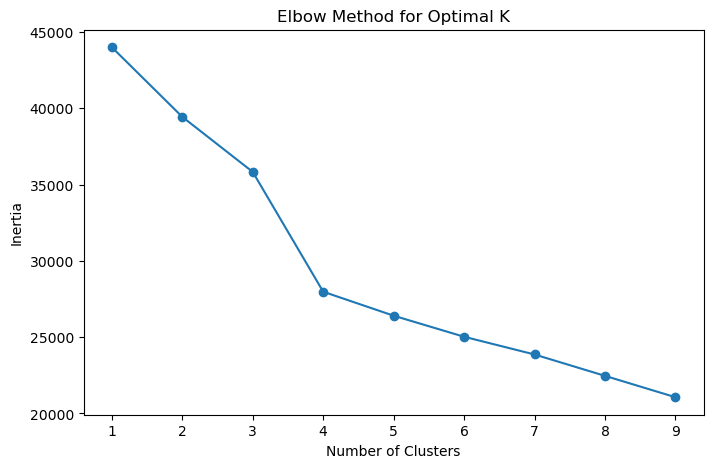

In [63]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Membuat plot untuk menentukan jumlah cluster optimal dari "sudut siku" grafik.

In [91]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

Menentukan jumlah cluster (optimal_k) dari hasil Elbow Method.
Melakukan clustering dengan K-Means.

In [83]:
data['Cluster'] = kmeans.labels_

Menambahkan label cluster ke dataset asli.

In [81]:
print("Cluster Counts:\n", data['Cluster'].value_counts())

Cluster Counts:
 Cluster
8    350
6    264
2    255
4    255
1    254
7    238
3    153
5    120
0    111
Name: count, dtype: int64


Menampilkan jumlah data di setiap cluster.

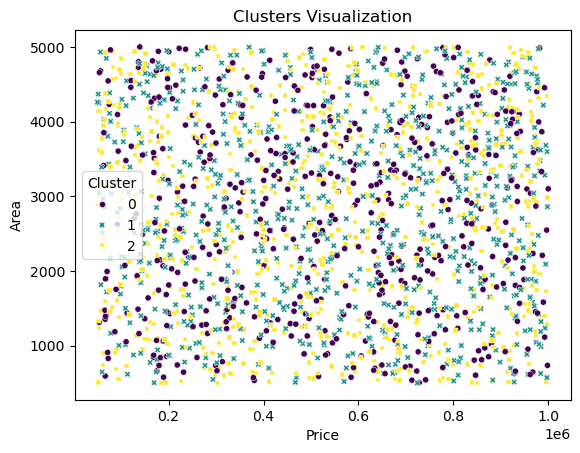

In [126]:
sns.scatterplot(
    x=data['Price'], y=data['Area'], 
    hue=data['Cluster'], palette='viridis', style=data['Cluster'], s=20
)
plt.title('Clusters Visualization')
plt.xlabel('Price')
plt.ylabel('Area')
plt.legend(title='Cluster')
plt.show()

Membuat scatter plot untuk melihat distribusi cluster berdasarkan Price dan Area.

In [101]:
data.to_csv('Home_Price_Clustered.csv', index=False)
print("Dataset dengan label cluster telah disimpan sebagai 'Home_Price_Clustered.csv'")

Dataset dengan label cluster telah disimpan sebagai 'Home_Price_Clustered.csv'


Simpan Dataset